# Helmet Streamer Simulation Program

Basic equations of time-dependent resistive magnetohydrodynamics (MHD):
# Basic equations
\begin{matrix}
-\rho \mathbf{v} \cdot \nabla \mathbf{v} - \nabla P + \mathbf{j} \times \mathbf{B} &=& \rho \dfrac{\partial\mathbf{v}}{\partial t} &(1)&
\\
-\nabla \cdot (\rho {\mathbf  {v}})&=& \dfrac{\partial\rho}{\partial t}&(2)\\
\mathbf{E} + \mathbf{v} \times \mathbf{B} &=& \eta \mathbf{j} &(3)&\\
\nabla \cdot {\mathbf{B}}&=&0&(4)\\
\mathbf{j} &=& \dfrac{1}{\eta_0} \nabla \times \mathbf{B} &(5)&\\
P &=& \rho R T &(6)&\\
\dfrac{\partial \mathbf{B}}{\partial t} &=& -\nabla \times {\mathbf{E}}&(7)&\\
\dfrac{\partial P}{\partial t} + \nabla \cdot (P\mathbf{v}) + (\gamma - 1) P \nabla \cdot \mathbf{v} &=& (\gamma - 1)\eta j^2 &(8)&\\
\end{matrix}

_________________________________________________________________________________________________

|sign|declaration|sign|declaration|
|-||-||-||-|
|$P$ | plasma pressur |$\mathbf{B}$  | magnetic field |
|$\rho$ | plasma density |$\mathbf{v}$ | plasa velocity |
|$\mathbf{E}$ | electric field |$R$ | gas constant|
|$T$ | temperatur |$\mathbf{j}$ | current density |
|$\eta$ | resistivity |$\gamma$ | adiabatic index |
|$\rho_0$ | vacuum permeability|




In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def initial_condition():
    """
    Initialization of all fields

    Based on T. Wiegelmann, K. Schindler and T. Neukirch
    Helmet Streamers with Triple Structures: 
    Weakly Two-Dimensional Stationary States
    ArXiv:astro-ph/971212v1
    """
    x0 = 0
    x02 = np.zeros((N_x, N_y, N_z))
    a, eta0, zcusp = 0.1, 0.0005, 4

    ho = 10
    a_s = 0.1
    c1 = 15
    c2 = 15 
    s1 = 0.8
    s2 = 0.4
    s3 = 0.2
    k1 = 1
    k2 = k1*np.exp(-(c1 + c2)*a_s)
    x01 = 0.0

    p0 = s1*np.exp(-s2*Z)+s3 
    p[:] = p0
    
    xsep = ((1/c1)*np.sqrt(2/p0)
           *np.arctanh(np.sqrt((p0 - k1*np.exp(-c1*a_s))/p0)))
#          *datanh(dsqrt((p0 - k1*np.exp(-c1*as))/p0),val)   
    
    p1 = np.exp(s2*Z)*s3+s1
    p2 = np.exp(a_s*c1+s2*Z)
    p3 = np.exp(s2*Z)
    p4 = np.exp(a_s*c1)
    p5 = np.sqrt((p3*s3+s1)/(2*p3))
    p6 = np.sqrt((-k1*p3+p3*p4*s3+p4*s1)/(p3*p4*s3+p4*s1))
    p7 = c1*p5*X-c1*p5*x0
    p8 = (np.sqrt((2*p3)/(p3*s3+s1))*np.arctanh(p6)*c1*p5 
          + np.sqrt((2*p3)/(p3*s3+s1))*np.arctanh(p6)*c2*p5 
          - c1*c2*p5*x0-c2*p7)
    
#    if(x .le. xsep) then X<xsep
    ay[0,X<xsep] = (-(2/c1)*np.log(np.cosh(c1*np.sqrt(p0[X<xsep]/2)
                    *(X[X<xsep] - 0)))+(1/c1)*np.log(p0[X<xsep]/k1))
    bx[0,X<xsep] = ((s1*s2*(2*np.cosh(p7[X<xsep])*p3[X<xsep]*p5[X<xsep]
                    -np.sinh(p7[X<xsep])*c1*p3[X<xsep]*s3*X[X<xsep] + np.sinh(p7[X<xsep])*c1*p3[X<xsep]*s3*x0
                    -np.sinh(p7[X<xsep])*c1*s1*X[X<xsep] + np.sinh(p7[X<xsep])*c1*s1*x0))/
                    (2*np.cosh(p7[X<xsep])*c1*p3[X<xsep]*p5[X<xsep]*(p3[X<xsep]*s3+s1)))
    bz[0,X<xsep] = (-2*np.sinh(p7[X<xsep])*p5[X<xsep])/np.cosh(p7[X<xsep])
    jy[0,X<xsep] = c1*p0[X<xsep]/(np.cosh(c1*X[X<xsep]*np.sqrt(p0[X<xsep]/2)))

#    else X>=xsep
    x02[X>=xsep] = (np.arctanh(np.sqrt((p0[X>=xsep] - k1*np.exp(-c1*a_s))/p0[X>=xsep]))*
                    np.sqrt(2/p0[X>=xsep])*(1/c1 + 1/c2))
    ay[0,X>=xsep]= (-(2/c2)*np.log(np.cosh(c2*np.sqrt(p0[X>=xsep]/2)
                    *(X[X>=xsep] - x02[X>=xsep])))+(1/c2)*np.log(p0[X>=xsep]/k2))
    bx[0,X>=xsep] = ((s1*s2*(2*np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                    np.cosh(p8[X>=xsep]/c1)*c1*p3[X>=xsep]*p5[X>=xsep]*p6[X>=xsep]
                    + np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                    np.sinh(p8[X>=xsep]/c1)*c1*c2*p3[X>=xsep]*p6[X>=xsep]*s3*X[X>=xsep]
                    + np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                    np.sinh(p8[X>=xsep]/c1)*c1*c2*p6[X>=xsep]*s1*X[X>=xsep]
                    - 2*np.sinh(p8[X>=xsep]/c1)*c1*p3[X>=xsep]
                    - 2*np.sinh(p8[X>=xsep]/c1)*c2*p3[X>=xsep]))/
                    (2*np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                     np.cosh(p8[X>=xsep]/c1)*c1*c2*p3[X>=xsep] *
                     p5[X>=xsep]*p6[X>=xsep]*(p3[X>=xsep]*s3+s1)))
    bz[0,X>=xsep] = (2*np.sinh(p8[X>=xsep]/c1)*p5[X>=xsep])/np.cosh(p8[X>=xsep]/c1)
    jy[0,X>=xsep] = c2*p0[X>=xsep]/(np.cosh(c2*X[X>=xsep]*np.sqrt(p0[X>=xsep]/2)))
                
    ax[:] = 0
    az[:] = 0
    by[:] = 0
    gauss[:] = 0
    rho[:] = p[:]*np.exp(-Z/ho)
    jx[:] = 0
    jz[:] = 0
    energy[:] = (p[:]/(gamma - 1) + (bx[:]*bx[:] + by[:]*by[:]+ bz[:]*bz[:])/(2*mu))
    eta[:] = (eta0*np.exp(-a*(Z-zcusp))*
                    np.tanh(abs(jy[:])))
#                   np.tanh(abs(dble(xjy(n,i,j,k))),val)
    ex[:] = 0
    ey[:] = eta[:]*jy[:]
    ez[:] = 0   

    plt.contour(energy[0, :, int(N_x/2)], 40)#, extent=(-0.5, 0.5, 0, 5))
    plt.show()
    plt.imshow(energy[0,:,int(N_x/2)])#, extent=(-0.5, 0.5, 0, 5))
    plt.show()
    
    return vx, vy, vz, ax, ay, az, bx, by, bz, ex, ey, ez

In [6]:
def cfl_check():
    """Courant-Friedrichs-Lewy condition"""
    dt[t_step] = (0.5 * max(vx[t_step-1].max(), vy[t_step-1].max(), vz[t_step-1].max())/
                     max(delta_x, delta_y, delta_z))
    if (0.001 <= dt[t_step] <= 2): 
        print("CFL Condition Warning:\nstepsize of timestep ", 
              t_step, "is unusual: ", dt[t_step])
    return 

In [7]:
def derivativ(field, dirección): 
    """
    1st order central differencing
    """
    if dirección == "x":
        daxis = 0
        delta = delta_x
    elif dirección == "y":
        daxis = 1
        delta = delta_y
    elif dirección == "z":
        daxis = 2
        delta = delta_z
    else: 
        print("fail")
        return
    return np.gradient(field, delta, axis=daxis)

In [8]:
###############################################################################
#                                Parameters                                   #
# Set the paramater:                                                          #
#       number of gridpoints:   N_x, N_y, N_z                                 #
#       number of timesteps:    N_t                                           #
#       simuletad box size:     x_min, x_max, y_min, y_max, z_min, z_max      #
#       gamma:                                                                #
#       mu:                                                                   #
###############################################################################
N_x, N_y, N_z, N_t = 100, 100, 100, 5
x_min, x_max, y_min, y_max, z_min, z_max = -0.5, 0.5, -0.5, 0.5, 0, 5
gamma = 5/3
mu = 1

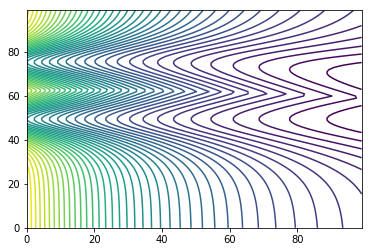

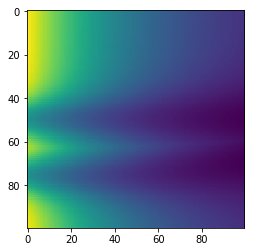

In [9]:
###############################################################################
#                                   Main                                      #
###############################################################################

# calculate geometric step sizes
delta_x, delta_y, delta_z =  (x_max - x_min)/N_x, (y_max - y_min)/N_y, (z_max - z_min)/N_z

# generate grid coordinates
x, y, z = np.linspace(x_min, x_max, N_x), np.linspace(y_min, y_max, N_y), np.linspace(z_min, z_max, N_z)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# declare 4 dimensional array: [time, x, y, z]
#       plasma velocity: vx, vy, vz     vector potential: ax, ay, az    magnetic field: bx, by, bz      
#       electric field:  ex, ey, ez     current density:  jx, jy, jz    energy density: energy
#       mass density:    rho            plasma pressure:  p             magn. resistivity: eta
#       divergence of b:  gauss                                 
vx, vy, vz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
ax, ay, az = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
bx, by, bz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
ex, ey, ez = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
jx, jy, jz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
energy, eta, gauss = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
p, rho = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
dt = np.zeros(N_t)

vx, vy, vz, ax, ay, az, bx, by, bz, ex, ey, ez = initial_condition()

#   Continuity Equation 
Startin with equation (2):  $$-\nabla \cdot (\rho {\mathbf{v}})= \dfrac{\partial \rho}{\partial t}$$  

\begin{equation*}
\frac{\partial \rho}{\partial t} \approx \frac{\rho_{n+1}-\rho_n}{\Delta t} = -\nabla (\rho \mathbf{v}) = -\mathbf{v} \nabla \rho -\rho \nabla \mathbf{v}=
-\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix}
\begin{pmatrix} \frac{\partial }{\partial x} \\
                \frac{\partial }{\partial y} \\  
                \frac{\partial }{\partial z} \end{pmatrix}
\rho -\rho 
\begin{pmatrix} \frac{\partial }{\partial x} \\
                \frac{\partial }{\partial y} \\  
                \frac{\partial }{\partial z} \end{pmatrix}
\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix} = \\
-(V_x\frac{\partial \rho}{\partial x} + V_y\frac{\partial \rho}{\partial y} + V_z\frac{\partial \rho}{\partial z})
-\rho(\frac{\partial V_x}{\partial x} +\frac{\partial  V_y}{\partial y} + \frac{\partial V_z}{\partial z}) \\
\Downarrow \\
\rho_{n+1}
= \rho_n - {\Delta t} \left[\left(V_x\frac{\partial \rho}{\partial x} + V_y\frac{\partial \rho}{\partial y} + V_z\frac{\partial \rho}{\partial z}\right)
+\rho\left(\frac{\partial V_x}{\partial x} +\frac{\partial  V_y}{\partial y} + \frac{\partial V_z}{\partial z}\right)\right]\\
\end{equation*}

#   Motion Equation 
Startin with basic equation (1):  $$
-\rho \mathbf{v} \cdot \nabla \mathbf{v} - \nabla P + \mathbf{j} \times \mathbf{B} = \rho \dfrac{\partial\mathbf{v}}{\partial t}
$$
I am solving it like a normal equation and not like a PDE :sweat:

\begin{equation*}
\dfrac{\partial\mathbf{v}}{\partial t} \approx \frac{\mathbf{v}_{n+1}-\mathbf{v}_n}{\Delta t} 
= \dfrac{1}{\rho}(-\rho (\mathbf{v}_n \nabla) \mathbf{v}_n - \nabla P + \mathbf{j} \times \mathbf{B}) 
=                -     (\mathbf{v}_n \nabla) \mathbf{v}_n - \dfrac{1}{\rho}\nabla P + \dfrac{1}{\rho}\mathbf{j} \times \mathbf{B} \\
\end{equation*}

\begin{equation*}
= -\left(\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix}
\cdot \begin{pmatrix} \frac{\partial }{\partial x} \\
                \frac{\partial }{\partial y} \\  
                \frac{\partial }{\partial z} \end{pmatrix}\right)
\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix}
-\dfrac{1}{\rho}
\begin{pmatrix} \frac{\partial }{\partial x} \\
                \frac{\partial }{\partial y} \\  
                \frac{\partial }{\partial z} \end{pmatrix}
P 
+\dfrac{1}{\rho}
\begin{pmatrix} j_x \\
                j_y \\
                j_z \end{pmatrix}
\times
\begin{pmatrix} B_x \\
                B_y \\
                B_z \end{pmatrix}
\end{equation*}

\begin{equation*}
= -\left(\frac{ V_x \partial}{\partial x} +\frac{V_y \partial}{\partial y} + \frac{V_z \partial}{\partial z}\right)
\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix}
-\dfrac{1}{\rho}
\begin{pmatrix} \frac{\partial P}{\partial x} \\
                \frac{\partial P}{\partial y} \\  
                \frac{\partial P}{\partial z} \end{pmatrix}
+\dfrac{1}{\rho}
\begin{pmatrix} j_y B_z - j_z B_y\\
                j_z B_x - j_x B_z \\
                j_x B_j - j_y B_x \\
                \end{pmatrix}
\end{equation*}

\begin{equation*}\Downarrow \\
\begin{pmatrix} V_{x, n+1} \\
                V_{y, n+1} \\
                V_{z, n+1} \end{pmatrix}
= \begin{pmatrix} V_{x, n} \\
                V_{y, n} \\
                V_{z, n} \end{pmatrix}
+\dfrac{1}{\Delta t}\left[
 -\left(\frac{ V_x \partial}{\partial x} +\frac{V_y \partial}{\partial y} + \frac{V_z \partial}{\partial z}\right)
\begin{pmatrix} V_x \\
                V_y \\
                V_z \end{pmatrix}
-\dfrac{1}{\rho}
\left(\begin{pmatrix} \frac{\partial P}{\partial x} \\
                \frac{\partial P}{\partial y} \\  
                \frac{\partial P}{\partial z} \end{pmatrix}+
\begin{pmatrix} j_y B_z - j_z B_y\\
                j_z B_x - j_x B_z \\
                j_x B_j - j_y B_x \\
                \end{pmatrix}\right) \right]
\end{equation*}

In [14]:
#       main time loop
for t_step in np.arange( 0, N_t - 1 ):
    print("Starting with timestep ", t_step)
    cfl_check()    
    
    vx[t_step + 1] = (  vx[t_step] 
                        + 1/dt[t_step] * (
                            - vx[t_step] * derivativ(vx[t_step], "x")
                            - vy[t_step] * derivativ(vx[t_step], "y") 
                            - vz[t_step] * derivativ(vx[t_step], "z")
                            - 1/rho[t_step] * ( derivativ(p[t_step], "x")
                                + jy[t_step] * bz[t_step] - jz[t_step] * by[t_step]
                      )))

    vy[t_step + 1] = (  vy[t_step] 
                        + 1/dt[t_step] * (
                            - vx[t_step] * derivativ(vy[t_step], "x")
                            - vy[t_step] * derivativ(vy[t_step], "y") 
                            - vz[t_step] * derivativ(vy[t_step], "z")
                            - 1/rho[t_step] * (derivativ(p[t_step], "y")
                                + jz[t_step] * bx[t_step] - jx[t_step] * bz[t_step]
                      )))

    vz[t_step + 1] = (  vz[t_step] 
                        + 1/dt[t_step] * (
                            - vx[t_step] * derivativ(vz[t_step], "x")
                            - vy[t_step] * derivativ(vz[t_step], "y") 
                            - vz[t_step] * derivativ(vz[t_step], "z")
                            - 1/rho[t_step] * (derivativ(p[t_step], "z")
                                + jx[t_step] * by[t_step] - jy[t_step] * bx[t_step]
                      )))


Starting with timestep  0
Starting with timestep  1


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in multiply
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:1763: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (f[slice4] - f[slice2]) / (2. * dx[i])
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:1784: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (y[slice2] - y[slice3]) / dx_0
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:1791: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (y[slice2] - y[slice3]) / dx_n


Starting with timestep  2
Starting with timestep  3


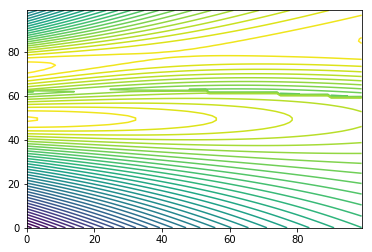

In [15]:
###############################################################################
#                                  plotting                                   #
###############################################################################
plt.contour(bx[0, :, int(N_x/2)], 40)#, extent=(-0.5, 0.5, 0, 5))
plt.show()